# Laboratory practice 2.1: Introduction to ML techniques
# Preparing the dataset
## DAVID TARRASA
For this practice, you will need the following dataset:

- **SimData.dat**: synthetic datasets containing several input variables and one output variable **Y**.

One of the core packages for machine learning in Python is **scikit-learn**. However, most of the time you *will not be so lucky as to use it* other than to check your answers, since the main idea here is that **you** learn how to code each method and how/why it works. *This goes both for different algorithms as well as preprocessing and analysis techniques*.

Further reading on the scikit-learn library (this will be your best friend in the near future, but again, for now is just for reference):
- [scikit-learn](https://scikit-learn.org)

In addition, we will be using the following libraries:
- Data management:
    - [numpy](https://numpy.org/)
    - [pandas](https://pandas.pydata.org/)
- Plotting (you do not have to use both, you can choose one or the other if you feel confortable):
    - [seaborn](https://seaborn.pydata.org/)
    - [matplotlib](https://matplotlib.org/)


---

In [174]:
# Load the necessary modules

# plotting libraries (you can use only one, for example plt)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# Data management libraries (you'll need both here)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Machine learning libraries (just so you see how some things can be done, although you may not use it too much)
from sklearn.model_selection import train_test_split

---

## STEP 1: IMPORT DATASET

In [175]:
# For starters, load the dataset here into a pandas dataframe called "df" and check the first rows with .head()

df = pd.read_csv("SimData.dat", sep="\t")
print(df.head())
print(df.dtypes)


           X1        X2    Y
0  -64.170401       NaN   NO
1  604.457235 -4.703332  YES
2  492.688339 -0.493488  YES
3  438.040887 -2.307669   NO
4  184.349042  2.680303   NO
X1    float64
X2    float64
Y      object
dtype: object


Is it a regression or a classification problem? Take into account that the target variable is "Y"

It's a classification problem. The target variable "Y" has two different classes: "YES" and "NO." 

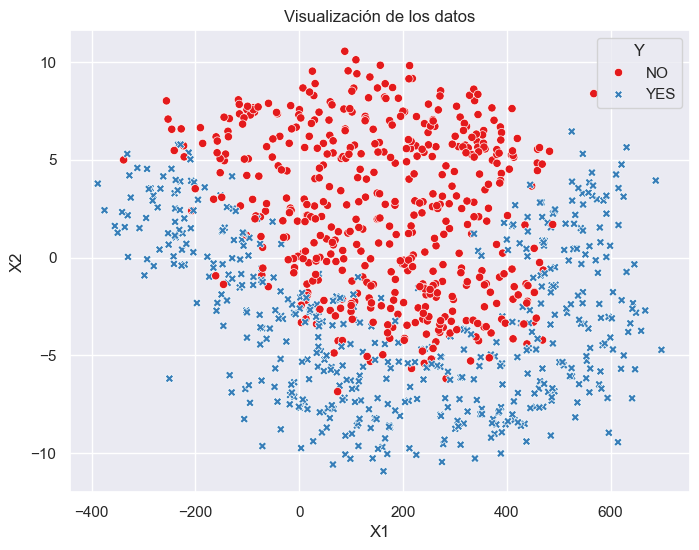

In [176]:
# Taking into account the shape of the dataset, plot it so that you can get acquainted with the data
# Make sure every class is distinguished using different colors and/or shapes in the plot


plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="X1", y="X2", hue="Y", style="Y", palette="Set1")
plt.title("Visualización de los datos")
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


## STEP 2: CHECK OUT THE MISSING VALUES

In [177]:
# Are there any missing values? How many? Where? 

print("Valores faltantes por columna:")
print(df.isnull().sum())



Valores faltantes por columna:
X1    2
X2    3
Y     1
dtype: int64


In [178]:
# In this case we will simply remove the missing values by removing the rows with NAs. Do this here.
df_clean = df.dropna()
# Check results. Was your removal succesful?
print("Valores faltantes después de limpiar:")
print(df_clean.isnull().sum())

Valores faltantes después de limpiar:
X1    0
X2    0
Y     0
dtype: int64


## STEP 3: PLOT THE DATA AND CHECK OUT FOR OUTLIERS

In [179]:
# Check your main statistics for the data variables and see if everything is clear
statistics = df_clean.describe()
print(statistics)

               X1          X2
count  996.000000  996.000000
mean   183.233656   -0.348326
std    238.507874    4.939723
min   -388.231360  -10.936124
25%     13.424622   -4.105678
50%    180.989524   -0.416657
75%    369.618619    3.544763
max    697.909378   10.558342


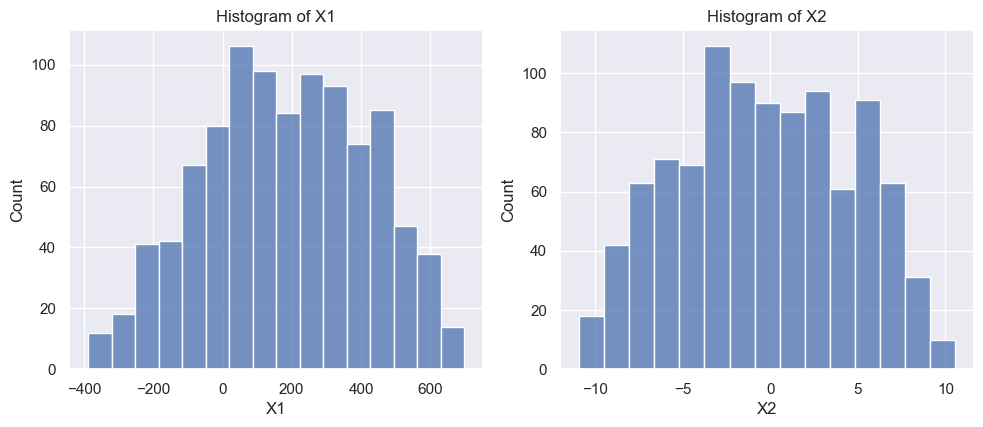

In [180]:
# Plotting is a good way to get to know the data. Do a histogram for each variable to see its behavior.
# Do you see any potential outliers you should take care of?
# a lo mejor podriamos considerar como outliers los extremos de la graficas utilizando cuantiles.

plt.figure(figsize=(10, 8))
for i, column in enumerate(df_clean.columns):
    if column != "Y":
        plt.subplot(2, 2, df_clean.columns.get_loc(column) + 1)
        sns.histplot(df_clean[column])
        plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()


## STEP 4: ENCODE CATEGORICAL VARIABLES

In [181]:
# Are there any categorical input variables? If unsure, check it
categorical_cols = df_clean.select_dtypes(include=['object', 'category']).columns
print("Variables categóricas:", categorical_cols)

Variables categóricas: Index(['Y'], dtype='object')


In [182]:
# Convert output variable to a factor (other types of numeric values are okay as well, but we will use this here)
df_clean['Y'] = df_clean['Y'].astype('category')
df_clean['Y'] = df_clean['Y'].map({'NO': 0, 'YES': 1})
df_clean.head

C:\Users\david\AppData\Local\Temp\ipykernel_16476\3416331393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Y'] = df_clean['Y'].astype('category')
C:\Users\david\AppData\Local\Temp\ipykernel_16476\3416331393.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Y'] = df_clean['Y'].map({'NO': 0, 'YES': 1})


<bound method NDFrame.head of              X1        X2  Y
1    604.457235 -4.703332  1
2    492.688339 -0.493488  1
3    438.040887 -2.307669  0
4    184.349042  2.680303  0
5    557.127451 -3.632923  1
..          ...       ... ..
995   19.836513  8.469974  0
996  111.016869  9.406449  0
997   11.893636  0.327663  0
998  524.692740 -5.657276  1
999  -97.142722 -6.531316  1

[996 rows x 3 columns]>

## STEP 5: Standardize the numerical variables

In [183]:
# Are the numerical variables in the same scale? If unsure, check it

scale_info = df_clean.agg({'X1': ['mean', 'std'], 'X2': ['mean', 'std']})

print("Mean and standard deviation for numerical variables:")
print(scale_info)
print("The difference in scales between the variables is noticeable.")

Mean and standard deviation for numerical variables:
              X1        X2
mean  183.233656 -0.348326
std   238.507874  4.939723
The difference in scales between the variables is noticeable.


The standardization should be done **after** we perform the train/test split, using only the mean and variance for the training dataset. In this case however, we will forget about this and just do it here, although this is something to keep in mind.

In [184]:
# Standardize the numerical variables. 
# Watch out!: Save the mean and variance so you can undo de standardization anytime you want to


numerical_cols = ['X1', 'X2']

mean_values = df_clean[numerical_cols].mean()
print(mean_values)
std_values = df_clean[numerical_cols].std()
print(std_values)
df_clean[numerical_cols] = (df_clean[numerical_cols] - mean_values) / std_values



X1    183.233656
X2     -0.348326
dtype: float64
X1    238.507874
X2      4.939723
dtype: float64


C:\Users\david\AppData\Local\Temp\ipykernel_16476\3228754383.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[numerical_cols] = (df_clean[numerical_cols] - mean_values) / std_values


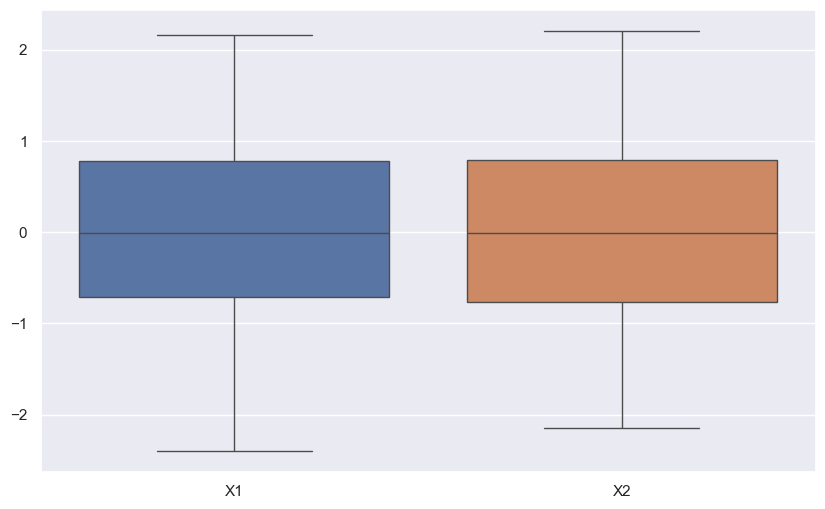

In [185]:
# Check if your process worked
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean[numerical_cols])
plt.show()


## STEP 6: EXPLORATORY ANALYSIS
Inside the exploratory analysis, feel free to play with the data to get to know it further. Some of the best ways to do so is plotting it, showing the correlation plot of numeric variables, etc.

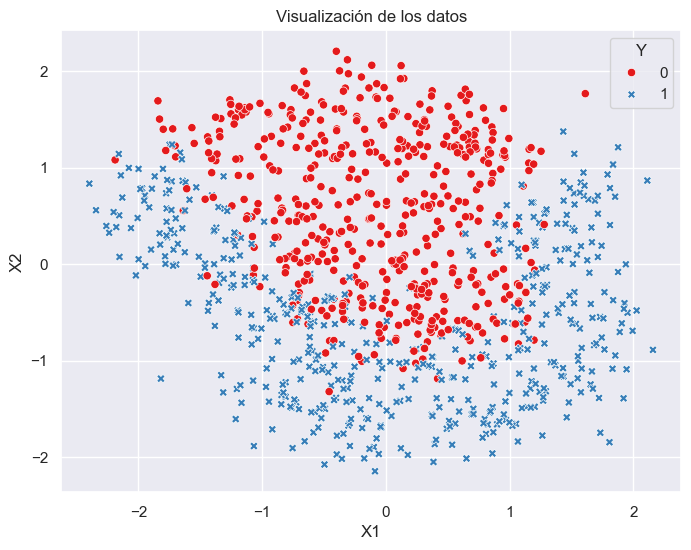

In [186]:
# Do again the scatterplot for the dataset, but now with the processed version

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x="X1", y="X2", hue="Y", style="Y", palette="Set1")
plt.title("Visualización de los datos")
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

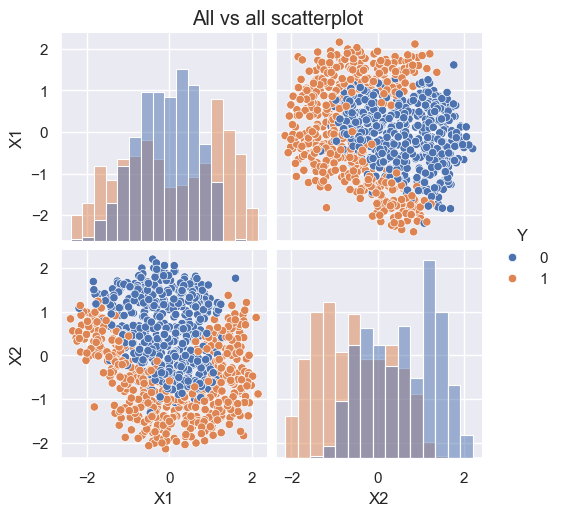

In [187]:
# One idea: perform a scatterplot where you face each variable against each other (all vs. all)

sns.pairplot(df_clean, hue='Y', diag_kind= "hist", markers=["o", "o"])
plt.suptitle('All vs all scatterplot', y=1.02)
plt.show()

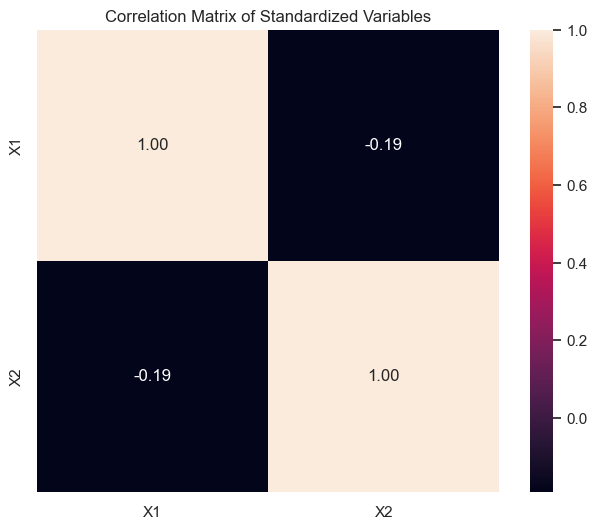

In [188]:
# Obtain and plot the correlation matrix 
# For this, you may want to use the .corr() method in pandas
correlation_matrix = df_clean[['X1', 'X2']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cbar=True, square=True, fmt='.2f')
plt.title('Correlation Matrix of Standardized Variables')
plt.show()


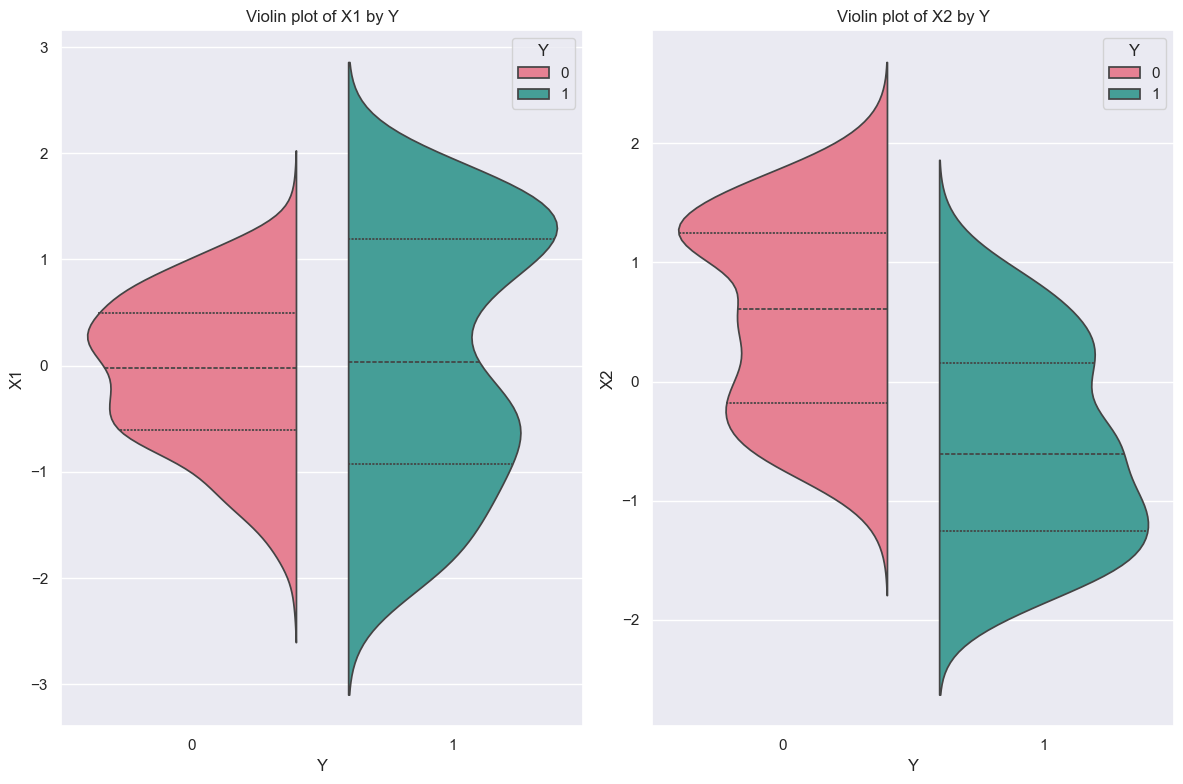

In [189]:
# Feel free to try any other exploration methods here!

plt.figure(figsize=(12, 8))

ax1 = plt.subplot(1, 2, 1)
sns.violinplot(x='Y', y='X1', data=df_clean, hue='Y', split=True, inner='quartile', palette='husl')
ax1.set_title('Violin plot of X1 by Y')

ax2 = plt.subplot(1, 2, 2)
sns.violinplot(x='Y', y='X2', data=df_clean, hue='Y', split=True, inner='quartile', palette='husl')
ax2.set_title('Violin plot of X2 by Y')

plt.tight_layout()  
plt.show()

## STEP 7: CHECK OUT FOR CLASS IMBALANCES

Are both classes balanced or not?

In [190]:
# Count instances for each class
class_counts = df_clean['Y'].value_counts()

print(class_counts)

Y
1    499
0    497
Name: count, dtype: int64


If both classes are kind of similar in number, you can consider the dataset _balanced_

## STEP 8: SPLIT THE DATA INTO TRAINING AND TEST SETS

Now, this is a critical point, and you should watch out here. Doing this properly is not difficult, but mistakes are expensive in this step! (and also you most likely will not notice them until much later, when it's already very far too late)

In [191]:
# Define input and output variables
input_variables = df_clean.drop(columns=['Y']) 
output_variables = df_clean['Y']  


In [192]:
# First: Shuffle the data (check out the .sample() method in pandas)
shuffled_df = df_clean.sample(frac=1, random_state=1)

# Then, separate the inputs, stored in "X" (pd.dataframe) from the target variable, stored in "y" (pd.series)
X = shuffled_df.drop('Y', axis=1)  
y = shuffled_df['Y']

Now for the crucial part: Separate the train and test datasets. 

For now, consider only train/test (forget the validation dataset) and make it so that the training set contains 80% of the data and the test set the remaining 20%


In [199]:
# How many rows will the training dataset have?

num_rows = shuffled_df.shape[0]
num_rows_training = int(0.8 * num_rows)
print(num_rows_training)

796


In [202]:
# Perform the split
training_data = shuffled_df.iloc[:num_rows_training]
test_data = shuffled_df.iloc[num_rows_training:]
print(training_data.shape[0])
print(test_data.shape[0])


796
200


In [203]:
# Check whether the shape of all dataframes is correct

print(f'Shape of data_train: {training_data.shape}')
print(f'Shape of data_test: {test_data.shape}')

Shape of data_train: (796, 3)
Shape of data_test: (200, 3)


In [196]:
# See how convenient sklearn becomes here, for example...
'''
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,  # percentage of test data
                                                    random_state=0, # seed for replication
                                                    stratify = y)   # Preserves distribution of y
'''

'\nX_train, X_test, y_train, y_test = train_test_split(X, y,\n                                                    test_size=0.2,  # percentage of test data\n                                                    random_state=0, # seed for replication\n                                                    stratify = y)   # Preserves distribution of y\n'

### 8.1 - Plot the train and test datasets
We'll do this simple check to see if everything looks fine here

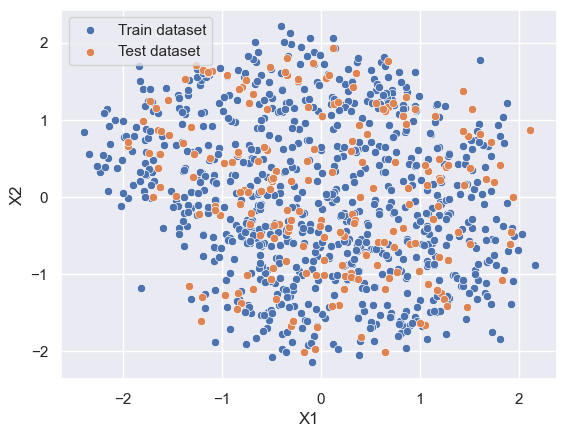

In [205]:
# To make plotting easier, group together train data and test data




# Plot the train and test datasets

sns.scatterplot(x='X1', y='X2', data=training_data)   
sns.scatterplot(x='X1', y='X2', data=test_data)
plt.legend(['Train dataset', 'Test dataset'])
plt.show()


In [206]:
# Store the train and test datasets to use it later
training_data.to_csv("train.dat", sep = "\t", index = False)
test_data.to_csv("test.dat", sep = "\t", index = False)

### **We are all set!** 

You can continue to the next practice, to start applying your first ML algorithm to the data: _K-nearest neighbors_

Also: any further checks of processing you think you need, feel free to try here!